# Assignment 3: Building Time Series Forecasts

**Student Name:** Alex Tomasella

**Date:** 2/14/2026

---

## Assignment Overview

In this assignment, you'll analyze temporal data from Corporación Favorita stores to identify trends, seasonality, and anomalies, then build forecasting models using decomposition techniques. You'll work with real retail sales data to predict future sales patterns.

---

## Step 1: Download Data, Import Libraries, and Load Data

The datasets for this analysis are too large too be stored on GitHub. To access the datasets for this assignment, you should:
- Go to the [Store Sales - Time Series Forecasting](https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data) dataset on Kaggle.
- Click Data 
- Scroll down and select **Download All**.
- Open the zip file and upload `train.csv`, `store.csv`, and `holidays_events.csv` to the `data` directory.

Once the CSV files have been added to the `data` directory, install all the of the necessary libraries for this assignment by running the command below.

In [7]:
pip install pandas numpy matplotlib seaborn scikit-learn statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Next, import the required libraries.

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# For time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


Finally, load the training, store, and holiday CSV data from the `data` directory using `pd.read_csv()`. Display basic information about the training data and print out the first few rows to get an understanding of what the training data looks like.

In [9]:
# Load the datasets
# TODO: Load all three required CSV files
train_df = pd.read_csv('data/train.csv')  # Replace with pd.read_csv('data/train.csv')
holidays_df =  pd.read_csv('data/holidays_events.csv') # Replace with pd.read_csv('data/holidays_events.csv')
stores_df = pd.read_csv('data/stores.csv')  # Replace with pd.read_csv('data/stores.csv')

# Display basic information
if train_df is not None:
    print(f"Training data shape: {train_df.shape}")
    print(f"Date range: {train_df['date'].min()} to {train_df['date'].max()}")
    print(f"\nFirst few rows:")
    # TODO: Display the first few rows
    print(train_df.head())

print("\n" + "="*80)
print("CHECKPOINT: Verify datasets loaded correctly")
print(f"Train data shape: {train_df.shape if train_df is not None else 'Not loaded'}")
print(f"Holidays data shape: {holidays_df.shape if holidays_df is not None else 'Not loaded'}")
print(f"Stores data shape: {stores_df.shape if stores_df is not None else 'Not loaded'}")
print("="*80)

Training data shape: (3000888, 6)
Date range: 2013-01-01 to 2017-08-15

First few rows:
   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0            0
1   1  2013-01-01          1   BABY CARE    0.0            0
2   2  2013-01-01          1      BEAUTY    0.0            0
3   3  2013-01-01          1   BEVERAGES    0.0            0
4   4  2013-01-01          1       BOOKS    0.0            0

CHECKPOINT: Verify datasets loaded correctly
Train data shape: (3000888, 6)
Holidays data shape: (350, 6)
Stores data shape: (54, 5)


### Explore Available Stores and Product Families
Display store information from `stores_df` to help choose a store. Consider looking at store type, cluster, and city

In [10]:
# Explore the data to help choose your store and products
if train_df is not None:
    print("Available stores:")
    print(f"Total number of stores: {train_df['store_nbr'].nunique()}")
    
    print("\nAvailable product families:")
    families = train_df['family'].value_counts().head(20)
    print(families)
    
    # TODO: Display store information from stores_df to help choose a store
    # Consider looking at store type, cluster, and city
    print("\nStore information:")
    print(stores_df)

Available stores:
Total number of stores: 54

Available product families:
family
AUTOMOTIVE             90936
BABY CARE              90936
BEAUTY                 90936
BEVERAGES              90936
BOOKS                  90936
BREAD/BAKERY           90936
CELEBRATION            90936
CLEANING               90936
DAIRY                  90936
DELI                   90936
EGGS                   90936
FROZEN FOODS           90936
GROCERY I              90936
GROCERY II             90936
HARDWARE               90936
HOME AND KITCHEN I     90936
HOME AND KITCHEN II    90936
HOME APPLIANCES        90936
HOME CARE              90936
LADIESWEAR             90936
Name: count, dtype: int64

Store information:
    store_nbr           city                           state type  cluster
0           1          Quito                       Pichincha    D       13
1           2          Quito                       Pichincha    D       13
2           3          Quito                       Pichincha    D   

---
## Step 2: Select and Prepare Your Time Series Data

### Select Your Store and Product Families

Choose one store and one product family (PRODUCE, BEVERAGES, BREAD/BAKERY, AUTOMOTIVE, etc.) to analyze.

In [11]:
# TODO: Select your store and product family
selected_store = 17  # Replace with your chosen store number (e.g., 1)
product_family_1 = 'PRODUCE'  # Replace with the product family you selected (e.g., 'PRODUCE')

print(f"Selected Store: {selected_store}")
print(f"Product Family 1: {product_family_1}")

Selected Store: 17
Product Family 1: PRODUCE


### Filter Data
Filter the `train_df` data to your selected store and products. Create a date range from 2016-01-01 to 2017-08-15 for consistency.

In [ ]:
# TODO: Filter train_df for selected store and date range 2016-01-01 to 2017-08-15

# Convert date column to datetime if needed
if train_df is not None:
    train_df['date'] = pd.to_datetime(train_df['date'])

# Filter for date range
start_date = '2016-01-01'
end_date = '2017-08-15'

filtered_train_df = train_df[
    (train_df['store_nbr'] == selected_store) &
    (train_df['date'] >= start_date) &
    (train_df['date'] <= end_date)
]

# TODO: Create filtered datasets for each product family
product1_data = filtered_train_df[filtered_train_df['family'] == product_family_1]  # Filter for store, product_family_1, and date range

print("\n" + "="*80)
print("CHECKPOINT: Data filtered successfully")
print(f"Product data shape: {product1_data.shape if product1_data is not None else 'Not filtered'}")
print("="*80)


CHECKPOINT: Data filtered successfully
Product data shape: (592, 6)


### Aggregate Daily Sales
Aggregate daily sales and handle missing dates.

In [14]:
# TODO: Group by date and sum sales for each product family
product1_ts = product1_data.groupby('date')['sales'].sum()
# TODO: Create a complete date range and fill missing dates with 0 sales
date_range = pd.date_range(start=start_date, end=end_date, freq='D')


# Example structure (replace with your implementation):
# date_range = pd.date_range(start=start_date, end=end_date, freq='D')
# product1_ts = product1_data.groupby('date')['sales'].sum().reindex(date_range, fill_value=0)

product1_ts = product1_ts.reindex(date_range, fill_value=0)  # Replace with time series for your selected product
product1_ts.head()

2016-01-01       0.000
2016-01-02    1492.822
2016-01-03    2026.262
2016-01-04    1443.998
2016-01-05    1923.328
Freq: D, Name: sales, dtype: float64

### Plot Raw Time Series
Plot time series to see the raw patterns using matplotlib.

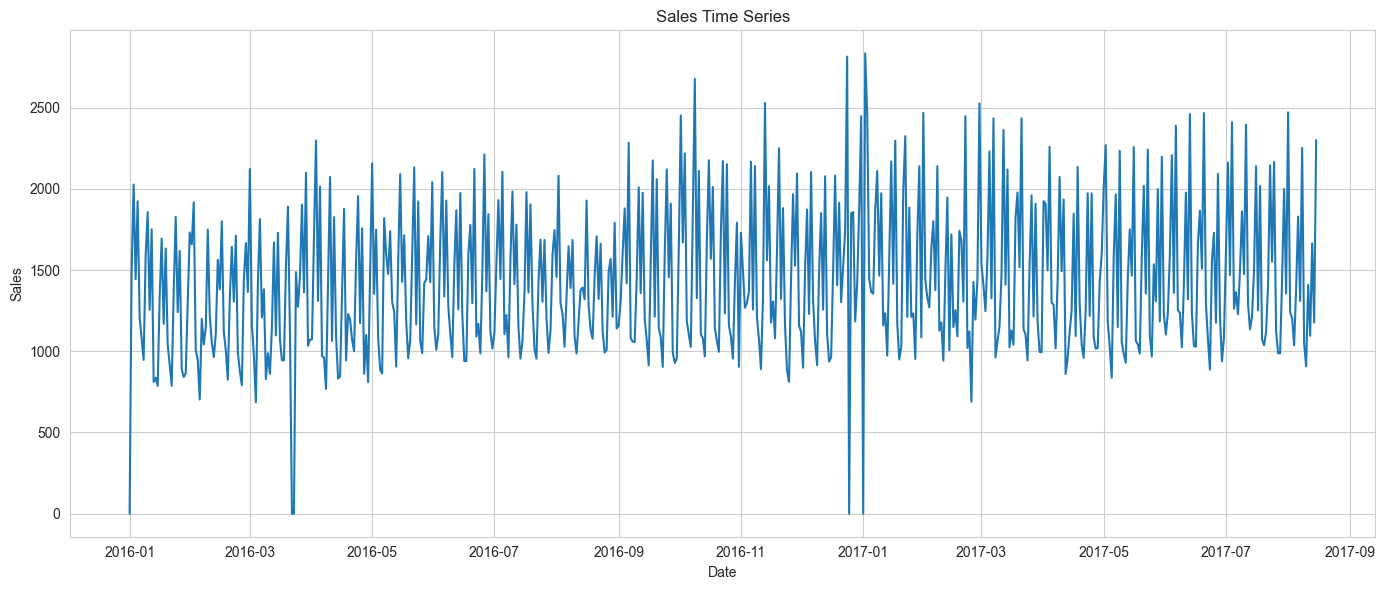

In [16]:
# Plot Product 1
# TODO: Plot product1_ts on a line chart as a time series

plt.figure(figsize=(14, 6))
plt.plot(product1_ts.index, product1_ts.values)
plt.title(f"Sales Time Series")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

### Document Your Choice (2-3 sentences)
Explain why you chose this product. 
- What contrasts do they represent? 
- Why will they be interesting to compare?

The graph shows that the sales fluctuate a lot and that it is very seasonal which is what I expected from produce whcih is why I chose it. I wanted to see if it would be seasonal like I expected whcih is why it is interesting to compare. 

---
## Step 3: Identify Trends Using Moving Averages

### Calculate Moving Averages
Calculate the 7-day and 30-day moving averages for the product you are analyzing.

In [17]:
# TODO: Calculate 7-day and 30-day moving averages for your product

# For Product 1
product1_ma7 = product1_ts.rolling(window=7).mean()  # Replace with product1_ts.rolling(window=7).mean()
product1_ma30 = product1_ts.rolling(window=30).mean()  # Replace with product1_ts.rolling(window=30).mean()

### Plot Original Sales
Using matplotlip, plot original sales with both moving averages (7-day and 30-day) overlaid.

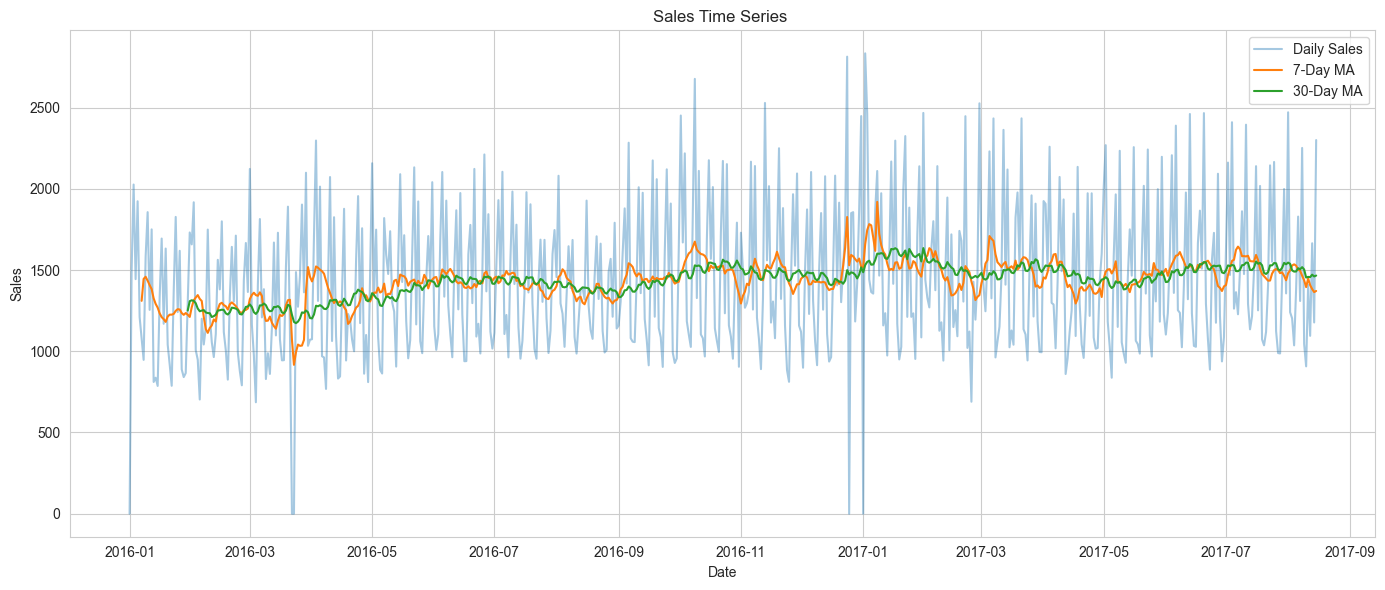

In [18]:
# Plot original sales with moving averages
fig, axes = plt.subplots(1, 1, figsize=(14, 6))

# Product 1
# TODO: Plot original, 7-day MA, and 30-day MA for product 1
axes.plot(product1_ts.index, product1_ts.values, alpha=0.4, label='Daily Sales')
axes.plot(product1_ma7.index, product1_ma7.values, label='7-Day MA')
axes.plot(product1_ma30.index, product1_ma30.values, label='30-Day MA')

axes.set_title(f"Sales Time Series ")
axes.set_xlabel("Date")
axes.set_ylabel("Sales")
axes.legend()

plt.tight_layout()
plt.show()

### Identify and Explain Trend Changes

Merge the data with `holidays_events.csv` to explain what caused these changes.

In [19]:
# Merge with holidays to explain trend changes
# TODO: Convert holidays_df date to datetime and filter for your date range
if holidays_df is not None:
    holidays_df['date'] = pd.to_datetime(holidays_df['date'])
    relevant_holidays = holidays_df[
        (holidays_df['date'] >= start_date) &
        (holidays_df['date'] <= end_date)
    ]
    
    # TODO: Display holidays that might explain trend changes
    print("Key holidays/events in the period:")
    # Display relevant holidays
    print(relevant_holidays[['date', 'description']])

Key holidays/events in the period:
          date                             description
211 2016-01-01                      Primer dia del ano
212 2016-02-08                                Carnaval
213 2016-02-09                                Carnaval
214 2016-03-02                      Fundacion de Manta
215 2016-03-25                           Viernes Santo
..         ...                                     ...
322 2017-07-25                  Fundacion de Guayaquil
323 2017-08-05                 Fundacion de Esmeraldas
324 2017-08-10           Primer Grito de Independencia
325 2017-08-11  Traslado Primer Grito de Independencia
326 2017-08-15                   Fundacion de Riobamba

[116 rows x 2 columns]


### Document Trend Analysis
For the product family you are analyzing, document:
1. Overall trend direction (growing, declining, stable)
2. Any trend changes that correlate with holidays or events
3. Business implications of the trends you discovered

Update the markdown cell below with your analysis.

**Product Trends:**
- Overall trend direction: I would say stable with a little growth.
- Key trend changes: There was a huge spike at the begining of 2017. It stabilizes well in March 2017. And bith moving averages are trending upward after the spike in 2017. 
- Holiday correlations: It seems like Christmas and New Years effected the sales. 
- Business implications: This means that the business should stock up on inventory during the Christmas and New Years time but also expect stable demand year round with seasonal boosts. 

---
## Step 4: Detect and Visualize Seasonal Patterns

Analyze the seasonal components of your sales data.

### Day-of-Week Analysis

Add day of week to your data and calculate the average sales by day. Create a bar plot to visualize the weekday patterns.

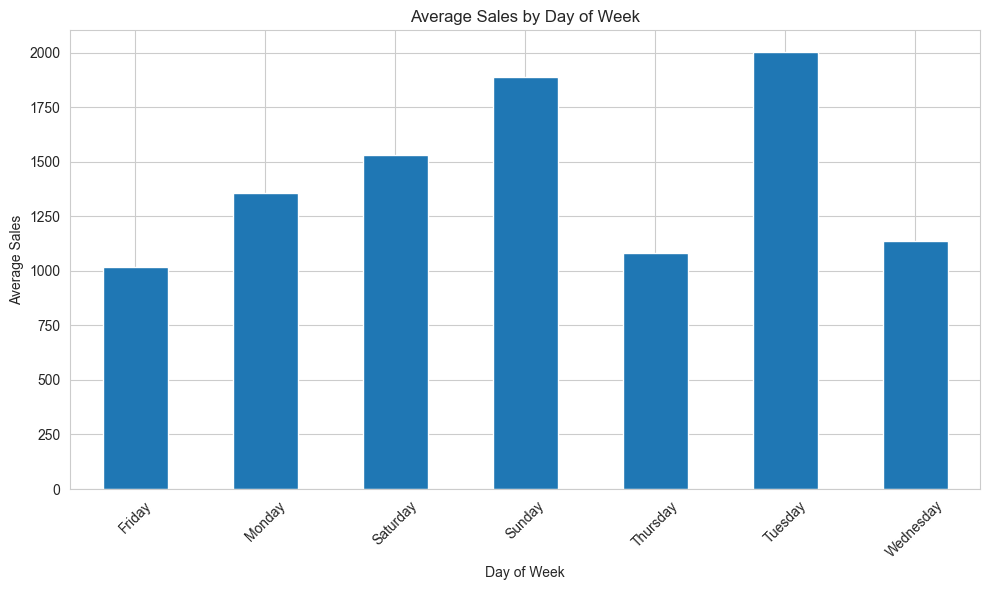

In [20]:
# Analyze day-of-week patterns
# TODO: Add day of week to your data and calculate average sales by day
product1_dow = product1_ts.to_frame()  # Create DataFrame with date and sales

# Add day of week: product1_dow['day_of_week'] = product1_dow.index.day_name()
product1_dow['day_of_week'] = product1_dow.index.day_name()
# Group by day of week and calculate mean sales
product1_dow_mean = product1_dow.groupby('day_of_week')['sales'].mean()
# Create bar plot comparing weekday patterns
# TODO: Create bar plot showing average sales by day of week
plt.figure(figsize=(10, 6))
product1_dow_mean.plot(kind='bar')
plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Average Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Monthly Seasonality Analysis

Calculate the average sales by month for both products. Once calculated, create a line plot showing monthly patterns for the product.

([<matplotlib.axis.XTick at 0x123e3abed80>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12')])

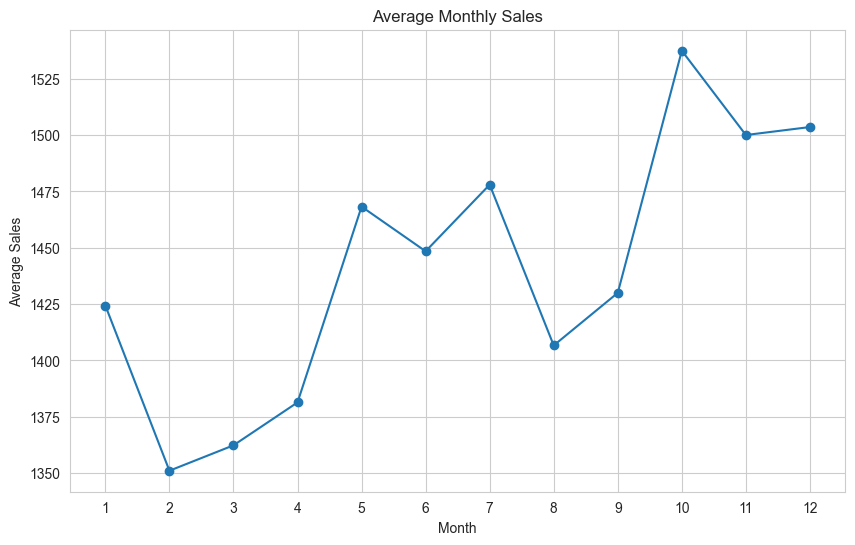

In [24]:
# Analyze monthly patterns
# TODO: Calculate average sales by month for the product.

# For Product 1
product1_monthly = product1_ts.groupby(product1_ts.index.month).mean()  # Group by month and calculate mean sales


# Create visualization
# TODO: Create line plot showing monthly patterns for both products
plt.figure(figsize=(10, 6))
plt.plot(product1_monthly.index, product1_monthly.values, marker='o', label='Product 1')
plt.title("Average Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.xticks(range(1, 13))

### Holiday Impact Analysis

Compare the average sales on holidays compared to regular days.

In [25]:
# Analyze holiday vs non-holiday sales
# TODO: Compare average sales on holidays vs regular days

# Create a list of holiday dates
holiday_dates = holidays_df['date'].unique()  # Extract unique dates from holidays_df

# Calculate average sales on holidays vs non-holidays for both products
# TODO: Split data into holiday and non-holiday sales and compare
product1_holiday = product1_ts[product1_ts.index.isin(holiday_dates)]
product1_non_holiday = product1_ts[~product1_ts.index.isin(holiday_dates)]

print(f"Average sales on holidays: {product1_holiday.mean()}")
print(f"Average sales on non-holidays: {product1_non_holiday.mean()}")

Average sales on holidays: 1409.7372287128712
Average sales on non-holidays: 1436.4012110569106


### Seasonal Pattern Findings

**Document your findings:**
- Which days of the week have highest/lowest sales?
- Are there monthly patterns (e.g., payday effects)?
- How do holidays affect each product differently?
- What business decisions could these patterns inform?

Update the markdown cell below with your analysis.

Tuesdays have the highest sales and Thursday has the lowest. Some monthly trends seem to be a drop off in Febuary and then a slow climb back until April a bump in August and then spike in November time. Againw e can see around Christmas time, it spikes significantly. This could mainly effect pricing, inventory, and staff. You may need to pick uo seasonal employees and stock up during Christmas. 

---
## Step 5: Build Simple Forecasts and Compare Methods

### Time Series Decomposition

In [26]:
# Perform seasonal decomposition
# TODO: Use seasonal_decompose to separate trend, seasonal, and residual components

# For Product 1
decomposition1 = seasonal_decompose(product1_ts, model='additive', period=7)

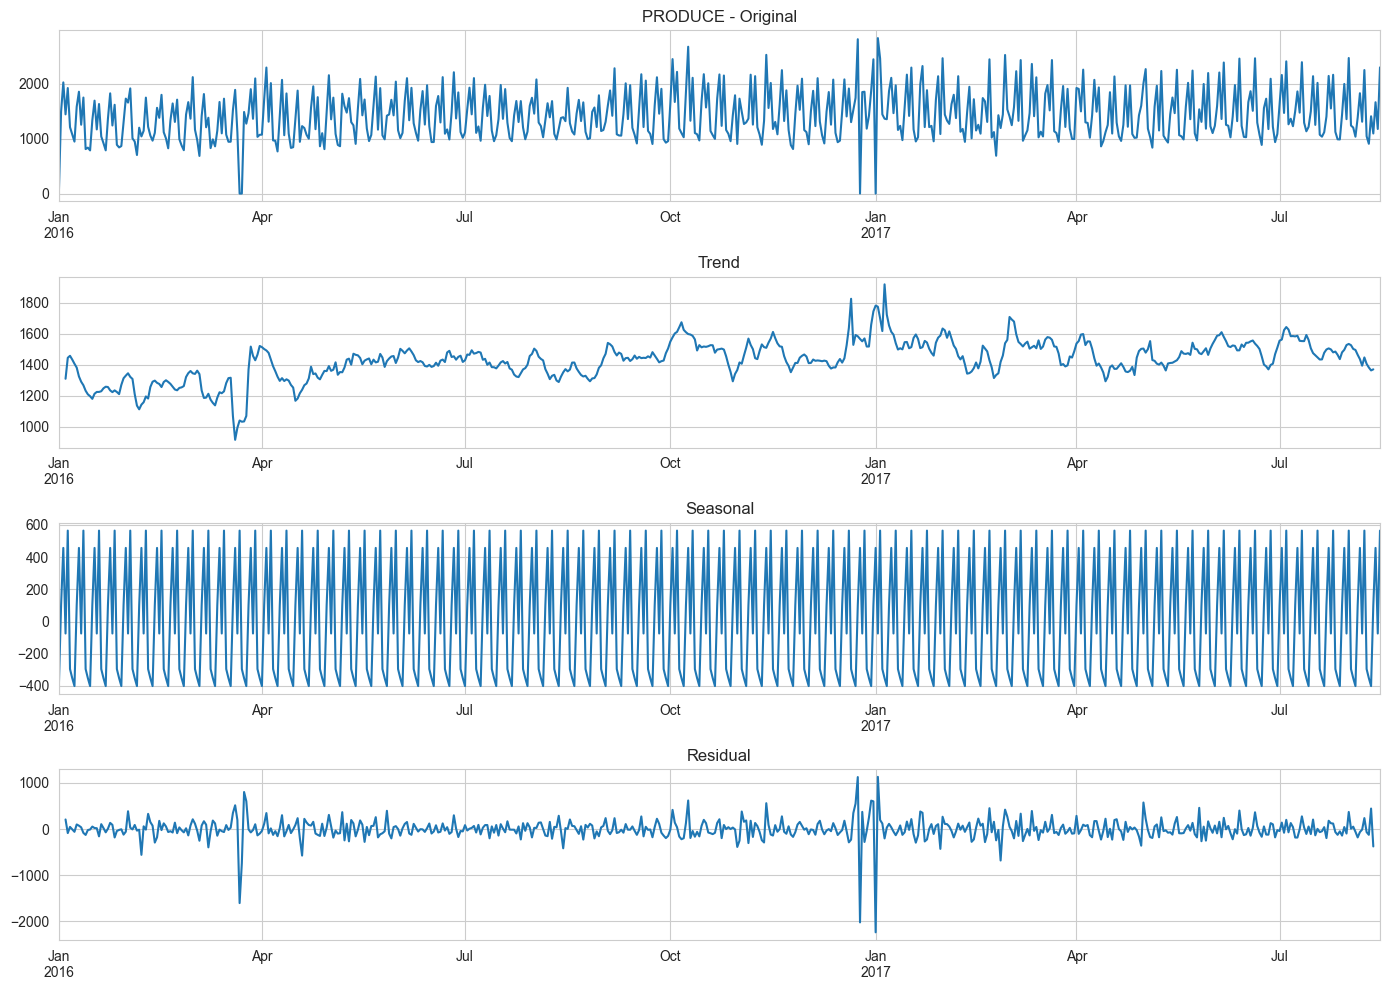

In [27]:
# Visualize decomposition for Product 1
if decomposition1 is not None:
    fig, axes = plt.subplots(4, 1, figsize=(14, 10))
    
    # TODO: Plot each component
    decomposition1.observed.plot(ax=axes[0], title=f'{product_family_1} - Original')
    decomposition1.trend.plot(ax=axes[1], title='Trend')
    decomposition1.seasonal.plot(ax=axes[2], title='Seasonal')
    decomposition1.resid.plot(ax=axes[3], title='Residual')
    
    plt.tight_layout()
    plt.show()

### Build Forecasts
Create a baseline forecast using the average of the last 30 days and a season naive forcast by repeating the last 7 days' pattern.

In [36]:
# Split data for validation
test_days = 30
train =product1_ts[:-test_days]
test =product1_ts[-test_days:]

# Method 1: Baseline forecast (30-day average)
baseline_forecast = np.repeat(train[-30:].mean(), test_days)

# Method 2: Seasonal Naive
# Just repeat the last 7 days pattern
last_week = train[-7:].values
seasonal_naive_forecast = np.tile(last_week, int(np.ceil(test_days/7)))[:test_days]

### Calculate Forecast Accuracy

In [41]:
# Calculate RMSE for both methods
# TODO: Calculate RMSE for baseline and seasonal forecasts

# Product 1
baseline_rmse = np.sqrt(mean_squared_error(test, baseline_forecast))
seasonal_rmse = np.sqrt(mean_squared_error(test1, seasonal_naive_forecast))

print(f"Baseline RMSE: {baseline_rmse:.2f}")
print(f"Seasonal RMSE: {seasonal_rmse:.2f}")

Baseline RMSE: 462.22
Seasonal RMSE: 208.49


In [43]:
# Create comparison table
comparison_data = {
    'Method': ['30-Day Average', 'Seasonal Naive (7-day repeat)'],
    'RMSE': [baseline_rmse, seasonal_rmse],
}

comparison_df = pd.DataFrame(comparison_data)

# TODO: Calculate percentage improvement
# Add improvement column to comparison_df
comparison_df['Improvement (%)'] = 100 * (comparison_df['RMSE'].iloc[0] - comparison_df['RMSE']) / comparison_df['RMSE'].iloc[0]


print("\n" + "="*80)
print("FORECAST PERFORMANCE COMPARISON")
print("="*80)
# TODO: Display comparison table
print(comparison_df)


print("="*80)


FORECAST PERFORMANCE COMPARISON
                          Method        RMSE  Improvement (%)
0                 30-Day Average  462.216079          0.00000
1  Seasonal Naive (7-day repeat)  208.486077         54.89424


### Visualize Forecasts

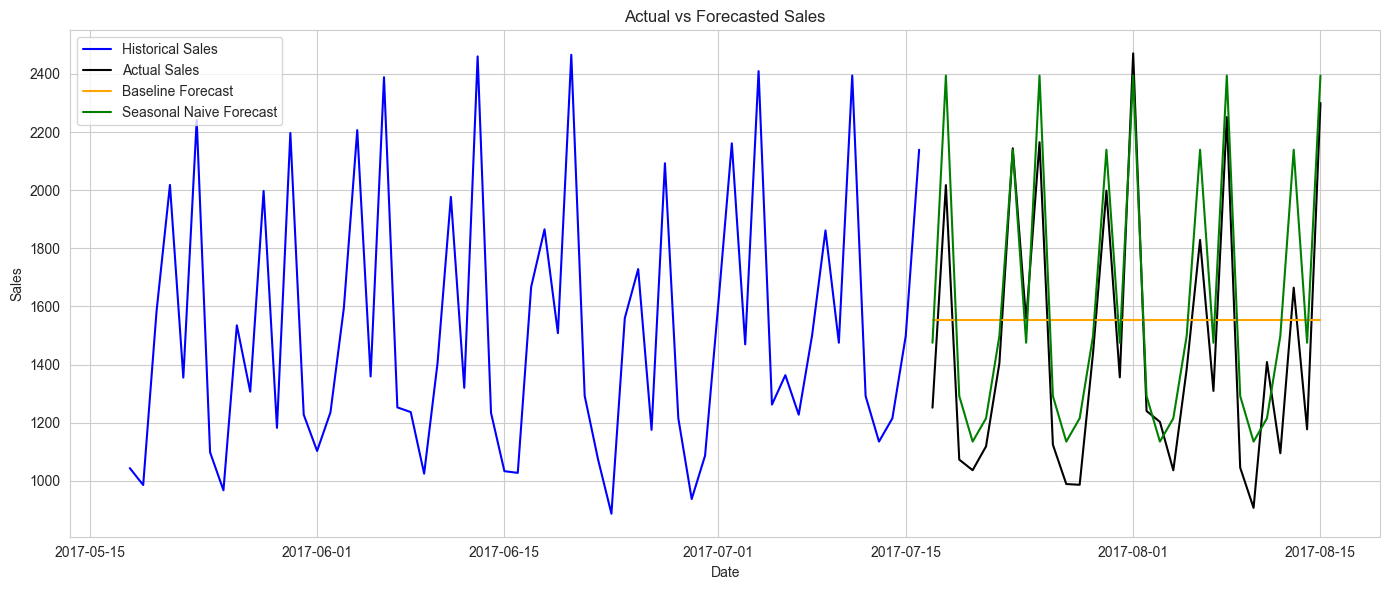

In [44]:
# Plot actual vs forecasted values
# TODO: Create visualization showing:
# - Historical data (last 60 days of train)
# - Actual test data
# - Baseline forecast
# - Seasonal naive forecast

plt.figure(figsize=(14, 6))
# Plot historical data  
plt.plot(train.index[-60:], train.values[-60:], label='Historical Sales', color='blue')
plt.plot(test.index, test.values, label='Actual Sales', color='black')
plt.plot(test.index, baseline_forecast, label='Baseline Forecast', color='orange')
plt.plot(test.index, seasonal_naive_forecast, label='Seasonal Naive Forecast',
            color='green')



# TODO: Plot on this single figure
plt.title("Actual vs Forecasted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()

plt.tight_layout()
plt.show()

---
## Step 6: Generate Business Recommendations

### Executive Summary (200-300 words)

Based on your analysis, write a brief executive summary that includes:
- **Key Patterns Discovered:** Summarize the main trends and seasonal patterns for each product
- **Inventory Planning Recommendations:** Specific recommendations based on your findings
- **High-Risk Periods:** Identify periods requiring special attention
- **Predictability Analysis:** Which product is more predictable and why?
- **Specific Action Item:** One concrete action the store manager should take based on your forecast

The analysis of produce for store number 17 over 2016 and 2017 shows several important patterns. The sales remained somewhat stable with a little growth which shows consistent demand. There was also strong seasonal effects and some trends within the days of the week. We saw that Tuesdays and Sundays were the most sales and then Thursday was the least. Lastly, we see that there is typically a spike in sales as we get closer to Christmas and the New Year. When it comes to inventory, they should increase it before the high demand months such as December but also before May, June, and July to prevent running out of anything. I would say that the high risk periods are again during Christmas time and the summer time when sales are at the highest. I think that produce is somewhat predictable. The seasonal naïve model showed us a lot when we compared it to the baseline forecast. One concrete action the store manager should do is increase produce inventory and staffing before the strong sales months. Preparing for these peaks can prevent low stock and hopefully drive more revenue with less panic. 

---
## Step 7: Submit Your Work

Before submitting:
1. Ensure all code cells run without errors
2. Verify all visualizations display correctly
3. Check that your analysis sections are complete
4. Review your executive summary

Push to GitHub:
```bash
git add .
git commit -m 'completed time series forecasting assignment'
git push
```

Submit your GitHub repository link on the course platform.